In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import figure, format_plots, COLORMAPS, PLOT_CONFIG, legend, save_factory

In [2]:
format_plots()
saver = save_factory(PLOT_CONFIG.save_path / "fig1-panels", tight_layout=False)

In [3]:
version = 11
df = pl.scan_parquet(
    f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/ontogeny_males_syllable_df_v00.parquet"
)

In [4]:
areas = (
    df.group_by(["age", "session_name", "uuid"])
    .agg([pl.col("area_px").median(), pl.col("recon_area").median()])
    .group_by("age")
    .agg([pl.col("area_px").mean(), pl.col("recon_area").mean()])
    .filter(pl.col("age") < 100)
    .collect()
)

melted_areas = areas.to_pandas().melt(
    id_vars="age", value_vars=["area_px", "recon_area"]
)

/tmp/ipykernel_10104/3103335650.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse area (px2)", xlabel="", xticklabels=["Original", "Transformed"])


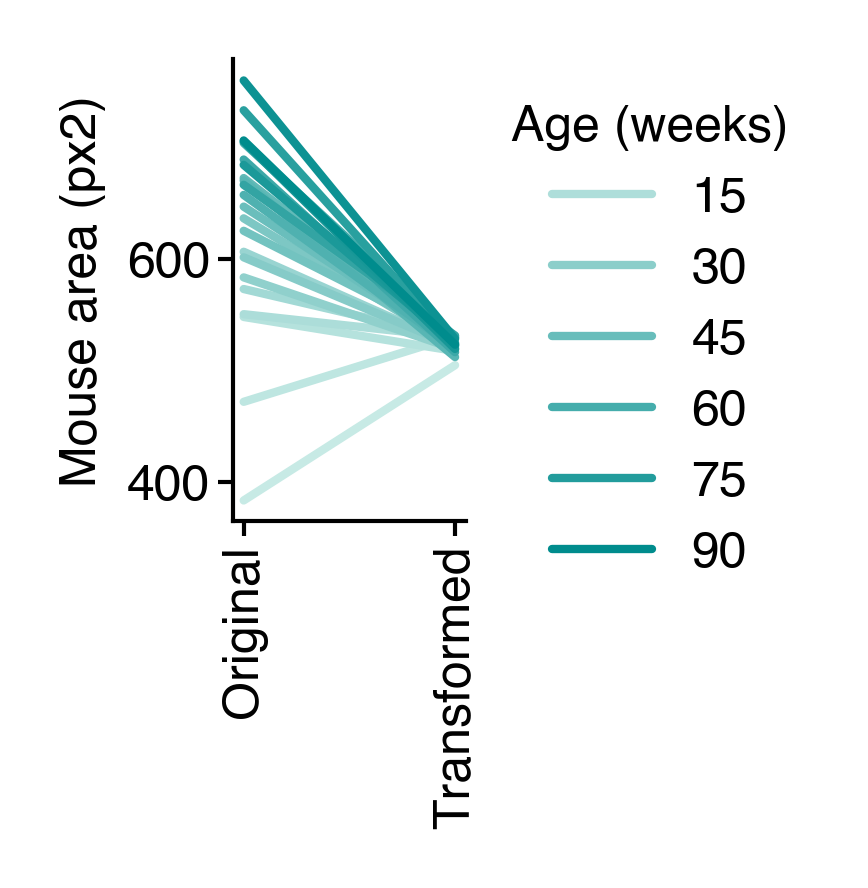

In [5]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=melted_areas, x="variable", y="value", hue="age", palette=COLORMAPS.ont_male
)
ax.set(ylabel="Mouse area (px2)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-mean");

In [6]:
widths = (
    df.group_by(["age", "session_name", "uuid"])
    .agg([pl.col("width_px").median(), pl.col("recon_width").median()])
    .group_by("age")
    .agg([pl.col("width_px").mean(), pl.col("recon_width").mean()])
    .filter(pl.col("age") < 100)
    .collect()
)

melted_widths = widths.to_pandas().melt(
    id_vars="age", value_vars=["width_px", "recon_width"]
)

/tmp/ipykernel_10104/3176879253.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse width (px)", xlabel="", xticklabels=["Original", "Transformed"])


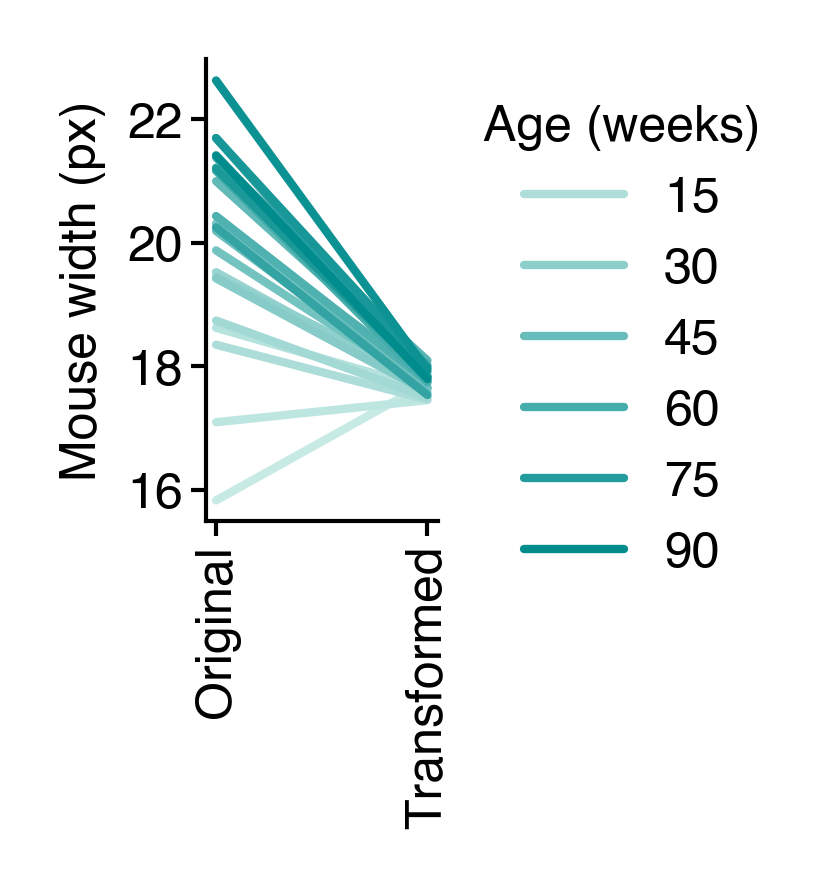

In [7]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=melted_widths, x="variable", y="value", hue="age", palette=COLORMAPS.ont_male
)
ax.set(ylabel="Mouse width (px)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-width-mean");

In [8]:
heights = (
    df.group_by(["age", "session_name", "uuid"])
    .agg([pl.col("height_ave_mm").median(), pl.col("recon_height").median()])
    .group_by("age")
    .agg([pl.col("height_ave_mm").mean(), pl.col("recon_height").mean()])
    .filter(pl.col("age") < 100)
    .collect()
)

melted_heights = heights.to_pandas().melt(
    id_vars="age", value_vars=["height_ave_mm", "recon_height"]
)

/tmp/ipykernel_10104/776769419.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse height (mm)", xlabel="", xticklabels=["Original", "Transformed"])


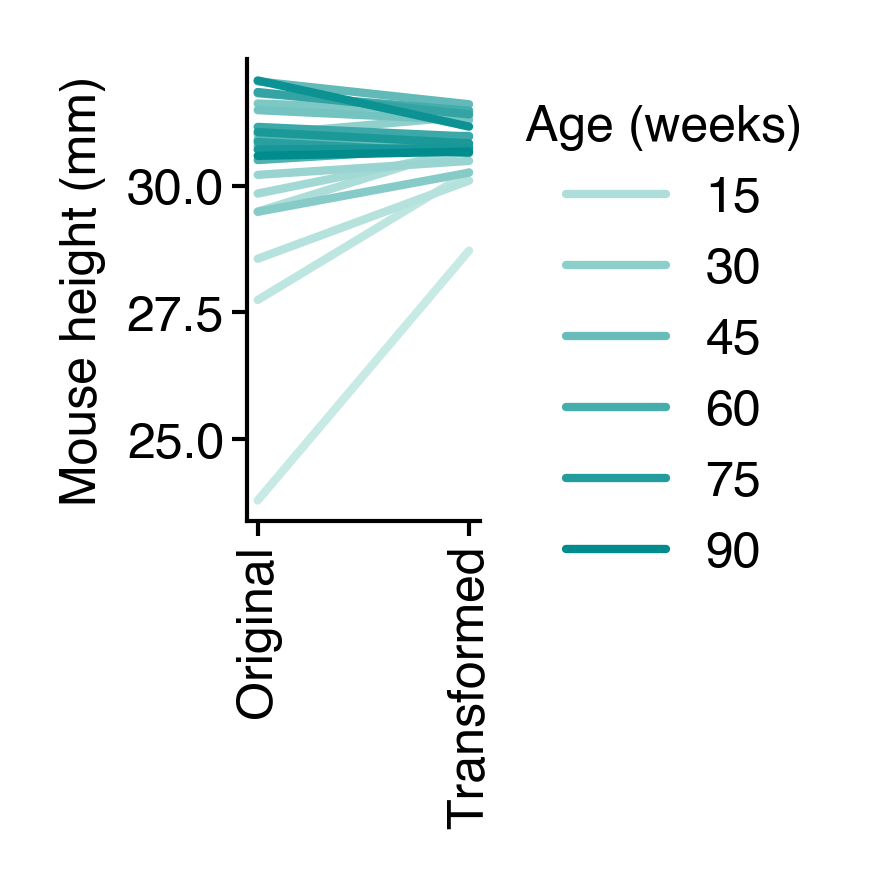

In [9]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=melted_heights, x="variable", y="value", hue="age", palette=COLORMAPS.ont_male
)
ax.set(ylabel="Mouse height (mm)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-height-mean");